In [1]:
print "Hello assigenment2"

Hello assigenment2


IDEA: Older people's duration is likely shorter than younger people.

NULL HYPOTHESIS: T(people born before 1970) > T(people born after 1970)

ALTERNATIVE HYPOTHESIS: T(people born before 1970) <= T(people born after 1970)

The significant level is 5%

In [86]:
import pylab as pl
import pandas as pd
import numpy as np
import datatime as dt
import os
import json

%pylab inline

ImportError: No module named datatime

In [44]:
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

In [45]:
os.getenv("PUIDATA")

'/home/cusp/xz1809/PUIdata'

In [46]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mkdir " + os.getenv("PUIDATA")) ##you have to make a new file directory first 
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA"))
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
    os.system("rm " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

In [47]:
datestring = '201508'
getCitiBikeCSV(datestring)

('Downloading', '201508')
file in place, you can continue


In [48]:
# make sure file's path
print os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"

/home/cusp/xz1809/PUIdata/201508-citibike-tripdata.csv


In [49]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [50]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [51]:
mydata = df[['tripduration','birth year','gender']]
mydata.head()

,tripduration,birth year,gender
0,1202,1987.0,1
1,301,1951.0,2
2,431,1985.0,1
3,273,1975.0,1
4,1256,1978.0,1


In [103]:
mydata['tripduration_min'] = mydata.tripduration / 60
mydata['age'] = 2015 - mydata['birth year']


# thing I originally want to do
#if mydata['age'] >= 45:
    #mydata['old_or_young'] = old
#else:
    #mydata['old_or_young'] = young

#mydata = mydata.drop(['old_or_young'],axis =1)
age_range = np.arange(1,100,20)
mydata['age_group'] = pd.cut(mydata['age'], bins = age_range)
    
mydata.head()

,tripduration,birth year,gender,tripduration_min,age,age_group
0,1202,1987.0,1,20.033333,28.0,"(21, 41]"
1,301,1951.0,2,5.016667,64.0,"(61, 81]"
2,431,1985.0,1,7.183333,30.0,"(21, 41]"
3,273,1975.0,1,4.550000,40.0,"(21, 41]"
4,1256,1978.0,1,20.933333,37.0,"(21, 41]"


In [89]:
mydata_mean = mydata.groupby(mydata.age_group).mean()
mydata_mean = mydata_mean.drop(['tripduration', 'birth year', 'age','gender'], axis=1)
mydata_mean.head()

,tripduration_min
age_group,
"(1, 21]",12.964495
"(21, 41]",13.556578
"(41, 61]",14.104834
"(61, 81]",14.287609


In [95]:
# ready to plot
fig=pl.figure(figsize(5,5))

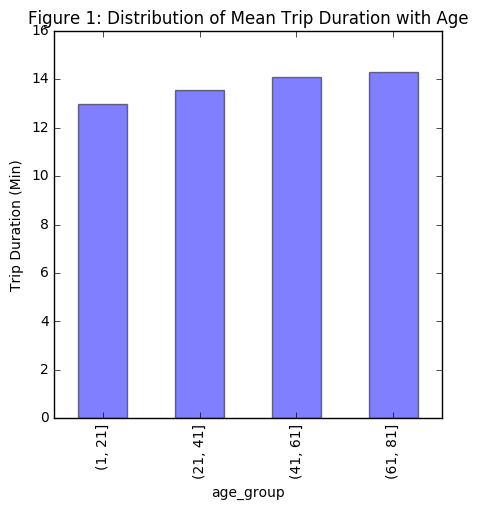

In [96]:
# Plot the abosolute number
mydata_mean.plot(kind='bar', alpha=0.5, legend=False)
plt.xlabel('age_group')
plt.ylabel('Trip Duration (Min)')
plt.title('Figure 1: Distribution of Mean Trip Duration with Age')
plt.show()


In [99]:
mydata_sum = mydata.groupby(mydata.age_group).sum()
mydata_sum

,tripduration,birth year,gender,tripduration_min,age
age_group,,,,,
"(1, 21]",10968741,2.813627e+07,18102,1.828124e+05,277245.0
"(21, 41]",507751069,1.238271e+09,787574,8.462518e+06,19566111.0
"(41, 61]",244353559,5.674319e+08,350854,4.072559e+06,14369130.0
"(61, 81]",26154897,5.947309e+07,35721,4.359150e+05,2004556.0


In [100]:
# plot the comparable number
mydata_normalized = pd.DataFrame()
mydata_normalized['normalized_trip_duration'] = mydata_sum.tripduration / mydata_sum.tripduration.sum()

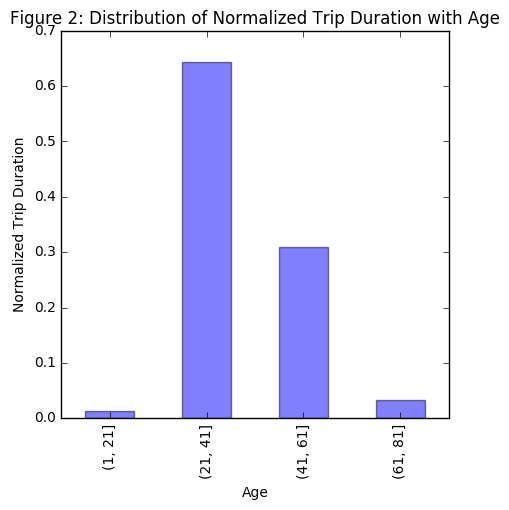

In [101]:
mydata_normalized.plot(kind='bar', alpha=0.5, legend=False)
plt.xlabel('Age')
plt.ylabel('Normalized Trip Duration')
plt.title('Figure 2: Distribution of Normalized Trip Duration with Age')
plt.show()

In [104]:
# Divide the data into two between age 45
below41 = mydata_normalized[0:2].normalized_trip_duration.sum()
above41 = mydata_normalized[2:4].normalized_trip_duration.sum()

In [110]:
# Calculate the standard error of the mean for trip durations
sample_std_above = mydata[mydata.age > 41].tripduration_min.std()
number_above = mydata[mydata.age > 41].tripduration_min.count()
error_above = sample_std_above / np.sqrt(number_above)

sample_std_below = mydata[mydata.age <= 41].tripduration_min.std()
number_below = mydata[mydata.age <= 41].tripduration_min.count()
error_below = sample_std_below / np.sqrt(number_below)

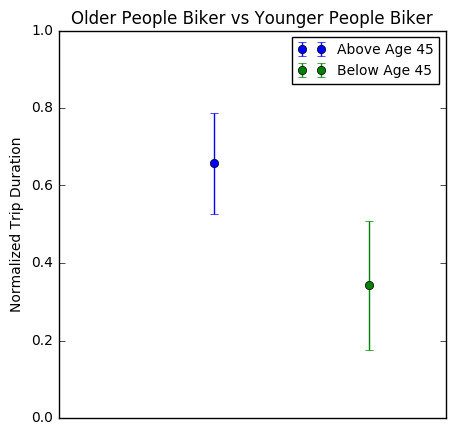

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.errorbar(x = [0.2], y = below41, yerr=error_below, fmt='o', label='Above Age 45')
ax.errorbar(x = [0.4], y = above41, yerr=error_above, fmt='o', label='Below Age 45')
ax.set_ylim(0,1)
ax.set_xlim(0,0.5)
ax.set_title('Older People Biker vs Younger People Biker')
ax.set_ylabel('Normalized Trip Duration')
plt.legend(fontsize = 10)

plt.show()